In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.ticker
%matplotlib inline
df_cardio_base = pd.read_csv('cardio_base.csv')
df_cardio_alco = pd.read_csv('cardio_alco.csv')
df_covid_data = pd.read_csv('covid_data.csv')

In [96]:
df_cardio_alco = df_cardio_alco['id;alco'].str.split(';', expand=True)

In [97]:
df_cardio_alco.rename(columns = {0:'id', 1:'alco'}, inplace = True)


In [98]:
df_cardio_alco['id']= df_cardio_alco['id'].astype(int)

In [99]:
train_data = pd.merge(df_cardio_base ,df_cardio_alco, on = 'id')

In [100]:
df_cardio_base1= pd.read_csv('cardio_base.csv')

In [101]:
result1 = pd.merge(df_cardio_base1, df_cardio_alco, on="id", how="outer", validate="one_to_one")

In [102]:
test_data= result1[result1['alco'].isnull()]

In [103]:
test_data.drop("alco", axis=1, inplace=True) 

<AxesSubplot:xlabel='years', ylabel='count'>

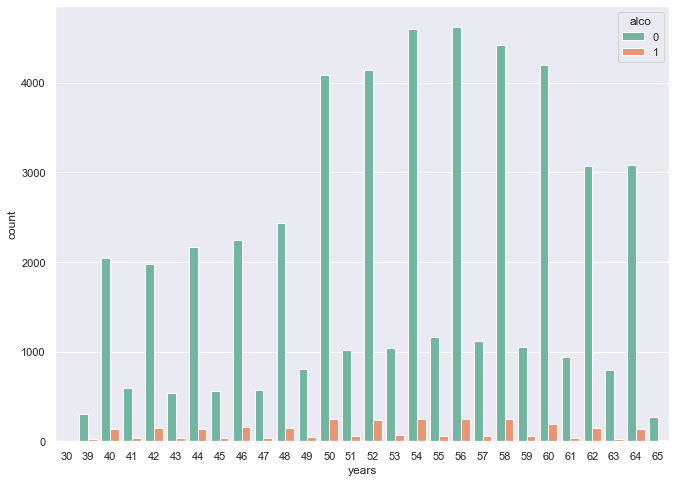

In [104]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
train_data['years'] = (train_data['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='alco', data = train_data, palette="Set2")

In [105]:
pd.crosstab(train_data['alco'],train_data['gender'],normalize=True)

gender,1,2
alco,,
0,0.632796,0.313762
1,0.016537,0.036905


In [106]:
df_cardio_base.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

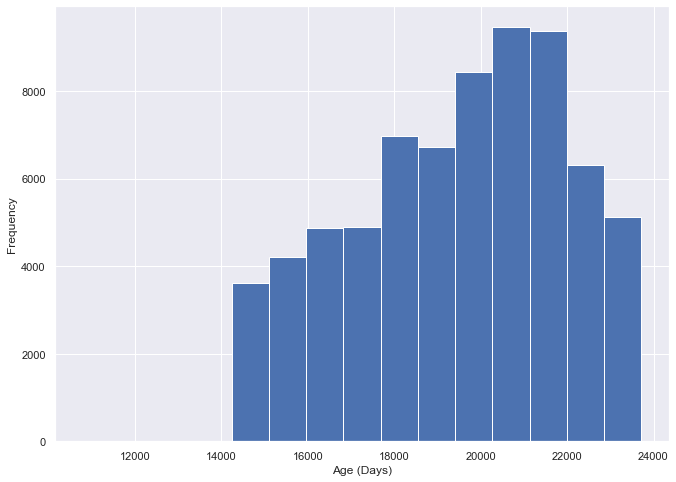

In [107]:
# Plot Histogram

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(df_cardio_base['age'],bins=15, cumulative=False)

ax.set_xlabel('Age (Days)')

ax.set_ylabel('Frequency')

plt.rcParams["figure.figsize"] = (20, 10)

plt.show()

In [108]:
df_cardio_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


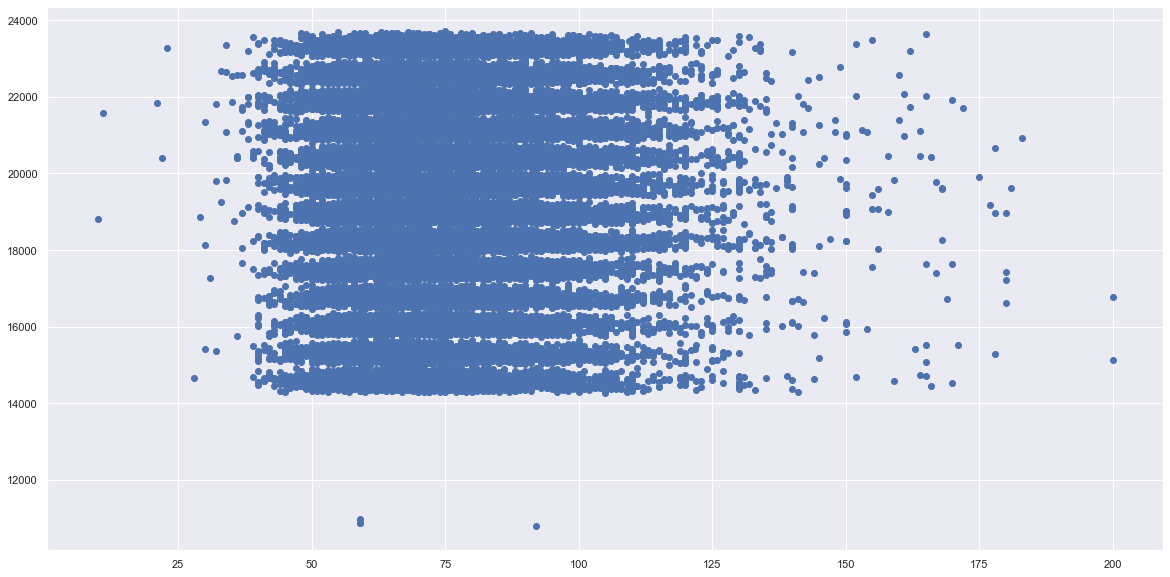

In [109]:

plt.scatter( df_cardio_base.weight, df_cardio_base.age)

In [110]:

df_cardio_base[df_cardio_base.age>50].cholesterol.mean()

1.3668714285714285

In [111]:
df_cardio_base.cholesterol.describe()

count    70000.000000
mean         1.366871
std          0.680250
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: cholesterol, dtype: float64

In [112]:
df_cardio_base.groupby('gender').smoke.value_counts(normalize=True)

gender  smoke
1       0        0.982144
        1        0.017856
2       0        0.781120
        1        0.218880
Name: smoke, dtype: float64

In [113]:
df_cardio_base[df_cardio_base.smoke==1].gender.value_counts(normalize=True)

2    0.868212
1    0.131788
Name: gender, dtype: float64

In [114]:
df_cardio_base.shape
df=df_cardio_base.head(700)

In [115]:
df.height.describe()

count    700.00000
mean     164.05000
std        8.67348
min       76.00000
25%      158.00000
50%      164.00000
75%      170.00000
max      188.00000
Name: height, dtype: float64

In [116]:
188-76

112

In [117]:
df_cardio_base.shape
df1=df_cardio_base.tail(700)

In [118]:
train_data.shape

(56903, 11)

In [119]:
train_data.alco=train_data.alco.astype('int64')

In [120]:
train_data.alco.dtype

dtype('int64')

In [121]:
#percentage of people with alcohol
df_alco=train_data[train_data.alco==1]
df_alco[df_alco.age>50].shape[0]/56903

0.05344182204804668

In [122]:

df_cardio_base.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,-0.003699
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,-0.047633
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,0.338135
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,0.187989
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.067780
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,-0.000922
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.005186
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.010354
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,1.000000


In [123]:
df_cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [124]:
train_data.cholesterol.describe()

count    56903.000000
mean         1.367872
std          0.680889
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: cholesterol, dtype: float64

In [125]:
train_data.groupby('alco').cholesterol.value_counts()

alco  cholesterol
0     1              40506
      2               7201
      3               6155
1     1               2038
      2                584
      3                419
Name: cholesterol, dtype: int64

In [126]:
train_data.groupby('alco').weight.mean()

alco
0    73.925549
1    78.377738
Name: weight, dtype: float64

In [127]:
train_data.groupby('alco').ap_lo.mean()

alco
0     96.201552
1    106.508057
Name: ap_lo, dtype: float64

In [128]:
train_data.groupby('alco').ap_hi.mean()

alco
0    128.945917
1    130.002960
Name: ap_hi, dtype: float64

In [129]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [130]:
from datetime import date
df_covid_data.date=df_covid_data.date.astype("datetime64")

In [131]:
df_IG=df_covid_data[(df_covid_data.location=='Italy') | (df_covid_data.location=='Germany')]

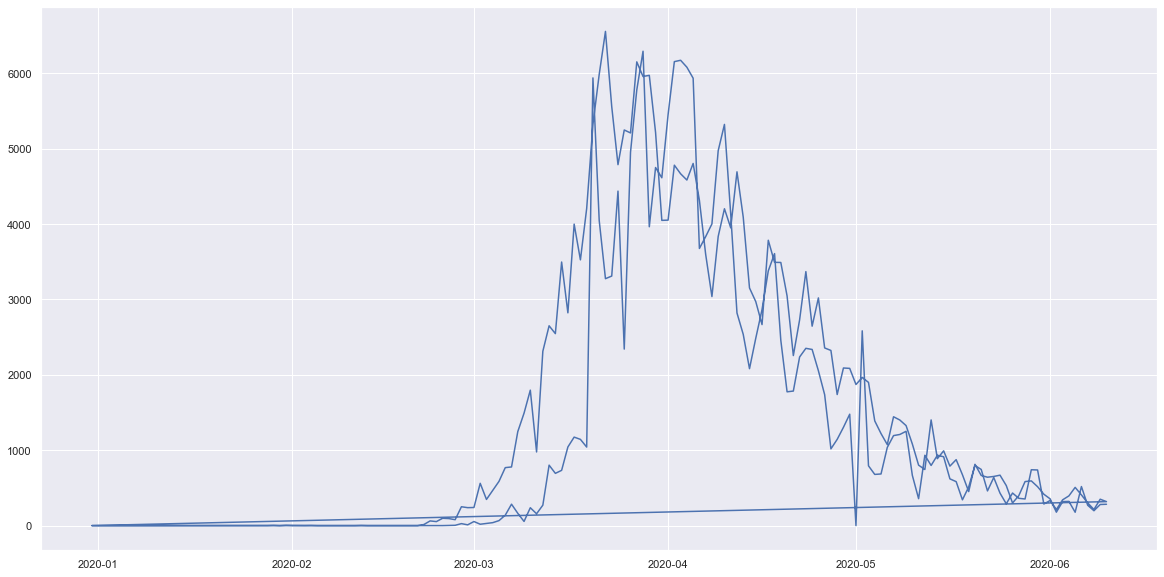

In [132]:
plt.plot(df_IG.date, df_IG.new_cases)

<AxesSubplot:xlabel='date', ylabel='new_cases'>

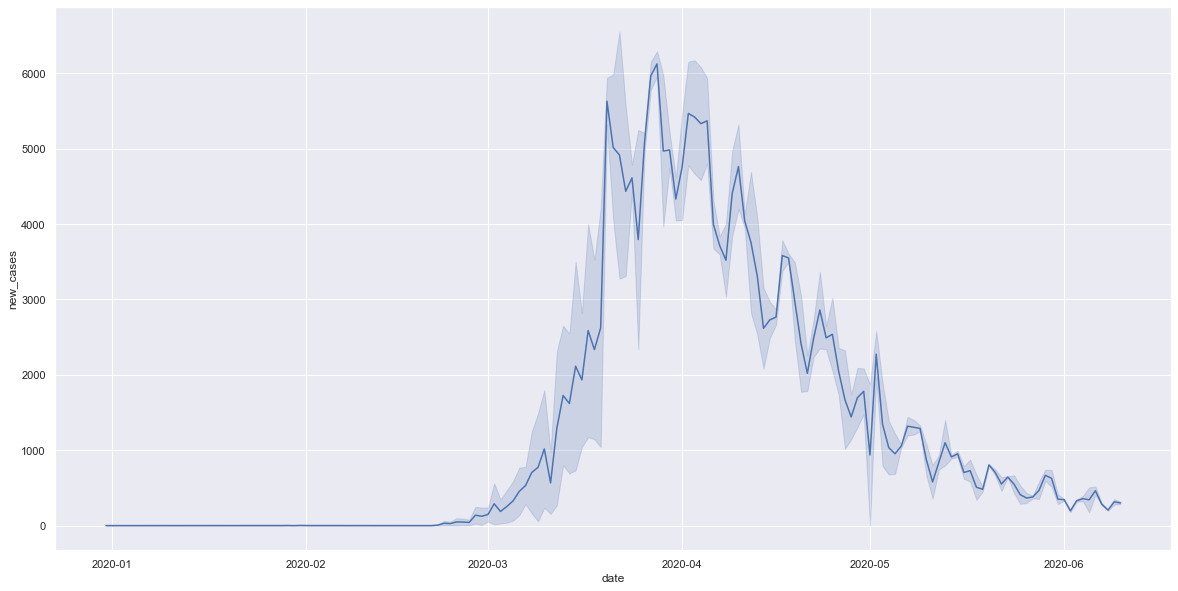

In [133]:
sns.lineplot(df_IG.date, df_IG.new_cases, hue_norm=None, legend='auto')

In [134]:
rise=df_IG.sort_values(by=['date','new_cases'])
rise

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
7914,Germany,2019-12-31,0,0,83783945.0,21.453,45229.245,8.00
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18
7915,Germany,2020-01-01,0,0,83783945.0,21.453,45229.245,8.00
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18
7916,Germany,2020-01-02,0,0,83783945.0,21.453,45229.245,8.00
...,...,...,...,...,...,...,...,...
8074,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.00
10849,Italy,2020-06-09,280,65,60461828.0,23.021,35220.084,3.18
8075,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.00
10850,Italy,2020-06-10,283,79,60461828.0,23.021,35220.084,3.18


In [135]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


In [136]:
y=df_covid_data[(df_covid_data.date >= '02/28/2020') & (df_covid_data.date <='03/20/2020')]

In [137]:
np.exp(y.date.dt.days_in_month)

59       3.931334e+12
60       3.931334e+12
61       2.904885e+13
62       2.904885e+13
63       2.904885e+13
             ...     
23077    3.931334e+12
23078    3.931334e+12
23079    2.904885e+13
23080    2.904885e+13
23081    2.904885e+13
Name: date, Length: 2107, dtype: float64

In [138]:
y.new_cases

59       0
60       0
61       0
62       0
63       3
        ..
23077    0
23078    0
23079    0
23080    0
23081   -9
Name: new_cases, Length: 2107, dtype: int64

In [139]:
#plt.plot(np.exp(y.date.dt.days_in_month),np.exp(y.new_cases))
y=np.exp(y.date.dt.days_in_month)
y

59       3.931334e+12
60       3.931334e+12
61       2.904885e+13
62       2.904885e+13
63       2.904885e+13
             ...     
23077    3.931334e+12
23078    3.931334e+12
23079    2.904885e+13
23080    2.904885e+13
23081    2.904885e+13
Name: date, Length: 2107, dtype: float64

In [182]:
df_covid_data['death_rate']=df_covid_data.new_deaths/df_covid_data.population

In [183]:
df_covid_data['death_rate']=df_covid_data.death_rate*1000000

In [184]:
df_covid_data

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death_rate
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,0.0
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,0.0
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,0.0
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,0.0
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,0.0
...,...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

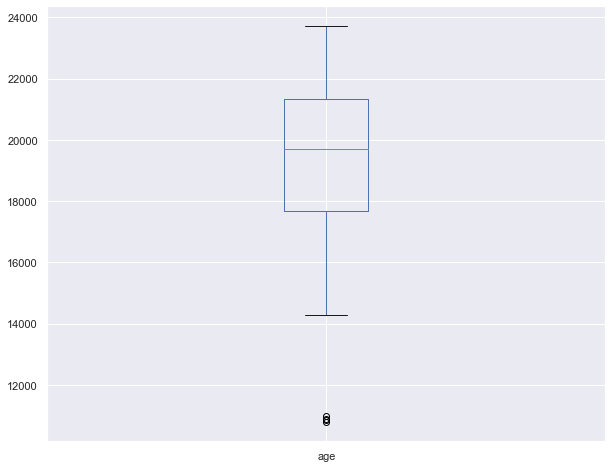

In [143]:
df = pd.DataFrame(df_cardio_base, columns=['age'])

df.plot.box(figsize =(10,8))

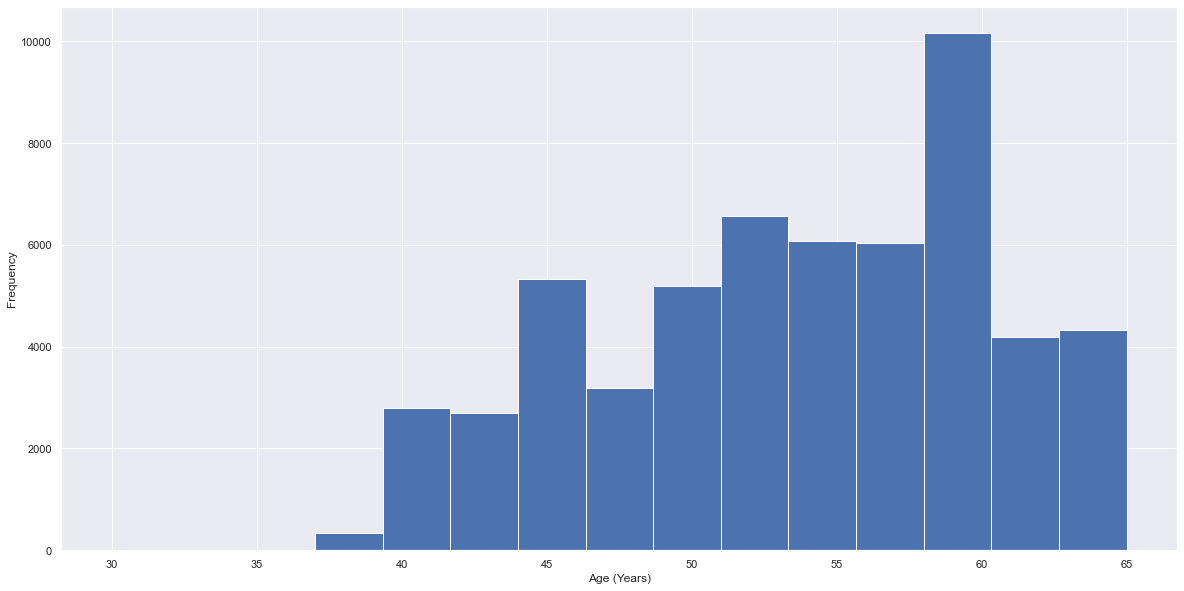

In [144]:
train_data['age_years'] = round(train_data['age']/365,0)

# Plot Histogram

fig, ax = plt.subplots()

ax.hist(train_data['age_years'],bins=15, cumulative=False)

ax.set_xlabel('Age (Years)')

ax.set_ylabel('Frequency')

plt.show()

In [145]:
# Get lowest 10 values
df_cardio_base['age'].sort_values()[:10]

22343    10798
30666    10859
6219     10878
55905    10964
31762    14275
23691    14277
38594    14282
45694    14284
53806    14287
54690    14291
Name: age, dtype: int64

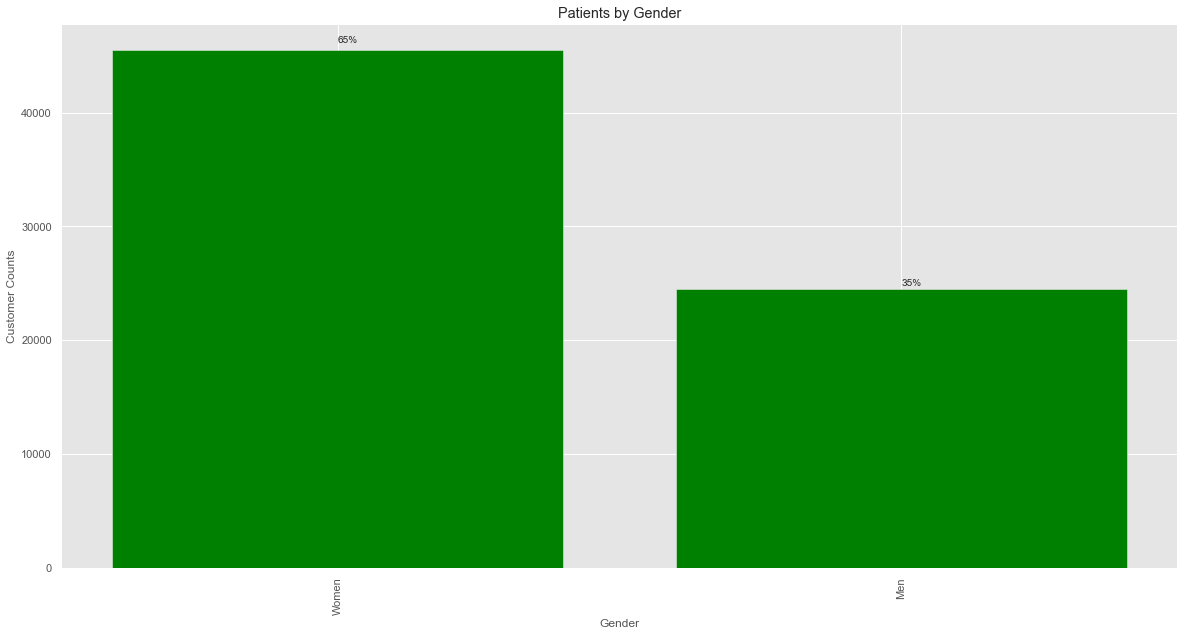

In [146]:
# Get counts for each gender

gender_summary=df_cardio_base.groupby('gender')['gender'].count()

gender_summary.index=['Women', 'Men']

# Get %

gender_pct = round(gender_summary*100/gender_summary.sum(),0)

# Bar Chart


plt.style.use('ggplot')

plt.bar(gender_summary.index, gender_summary, color='green')

plt.xlabel("Gender")

plt.ylabel("Customer Counts")

plt.title("Patients by Gender")

plt.xticks(rotation=90) # change orientation of X axis tick label

# text on the top

for index, value in enumerate(gender_pct):

    plt.text(index,gender_summary[index]+value*10, str(int(value))+"%")

plt.show()
plt.close()

In [147]:
df_cardio_base['height'] = np.where(df_cardio_base['height']>207,207,df_cardio_base['height'])

df_cardio_base['height'].sort_values()[-10:]

3237     198
63154    198
30238    198
12007    198
39351    198
40090    198
8897     198
41901    200
21628    207
6486     207
Name: height, dtype: int64

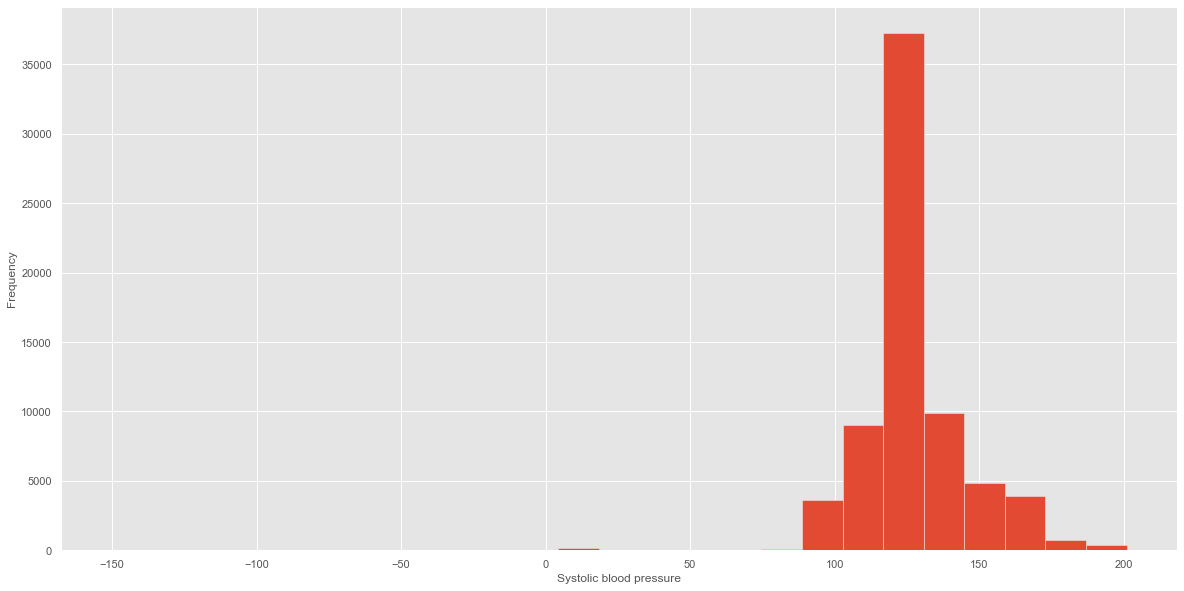

In [148]:
# Create multiple group using lamda function

def ap (values):

    if values<=120:

        return 1

    elif 120<values<=200:

        return 2

    else:

        return 3

df_cardio_base['ap_hi_cat']=df_cardio_base.ap_hi.apply(lambda x: ap(x) )

df_cardio_base['ap_hi_cat'].value_counts()

df_cardio_base['ap_hi'] = np.where(df_cardio_base['ap_hi']>200,201,df_cardio_base['ap_hi'])

# See distribution now

# Plot Histogram

fig, ax = plt.subplots()

ax.hist(df_cardio_base['ap_hi'],bins=25, cumulative=False)

ax.set_xlabel('Systolic blood pressure')

ax.set_ylabel('Frequency')

plt.show()

In [149]:
# Create multiple group using lamda function

def aplow (values):

    if values<=50:

        return 1

    elif 50<values<=120:

        return 2

    else:

        return 3

df_cardio_base['ap_lo_cat']=df_cardio_base.ap_lo.apply(lambda x: aplow(x) )

# Capping

def capping(series, lowMax, highMin):

    if series <lowMax:

        return lowMax

    elif series>highMin:

        return highMin

    else:

        return series

df_cardio_base['ap_lo'] = df_cardio_base.ap_lo.apply(lambda x: capping(x,50,120) )

In [150]:
df_cardio_base['ap_lo_mod_10'] = np.where(df_cardio_base['ap_lo']%10==0,1,0)

df_cardio_base['ap_lo_mod_10'].value_counts()

1    68017
0     1983
Name: ap_lo_mod_10, dtype: int64

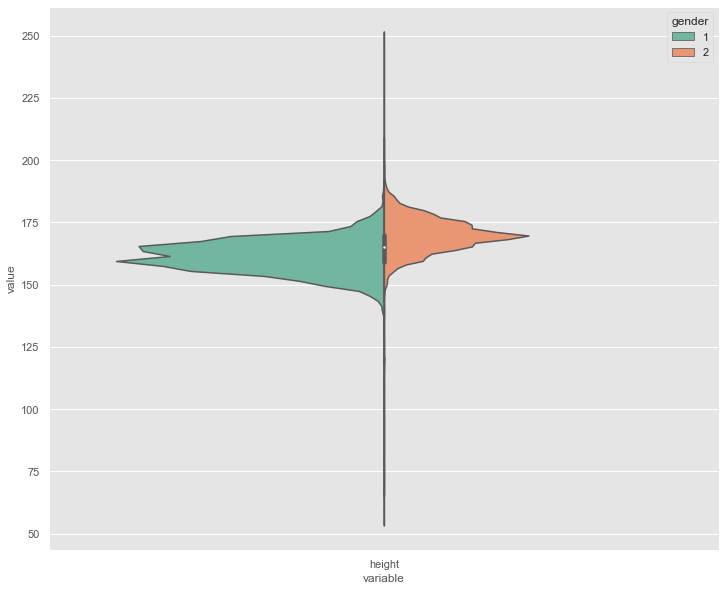

In [151]:
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=train_data, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2")

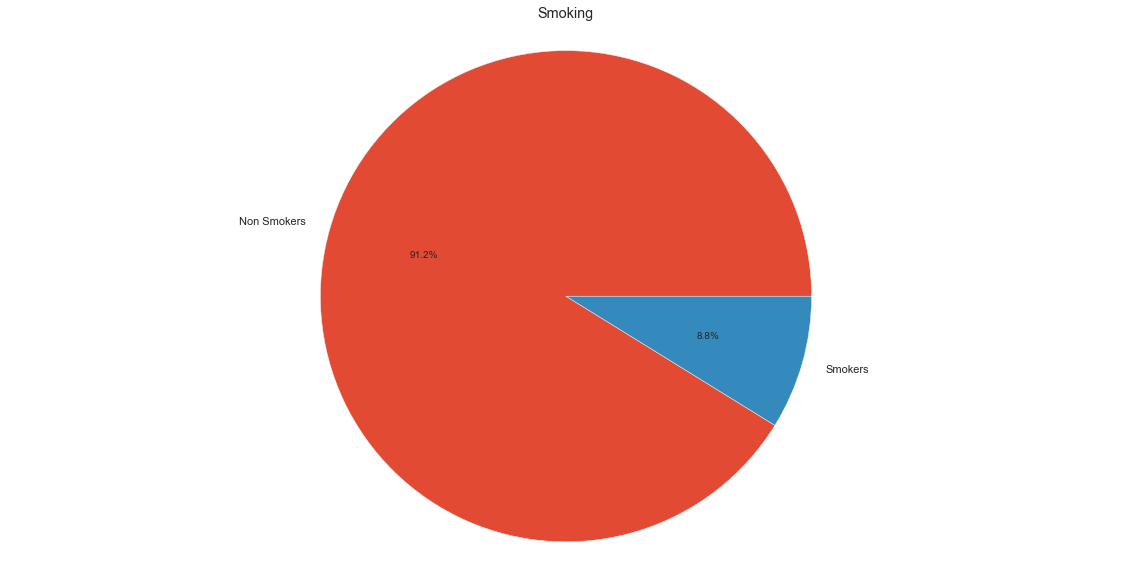

In [152]:
# Create summary table

smoke_summary=df_cardio_base.groupby('smoke')['smoke'].count()

# Pie Chart

import matplotlib.pyplot as plt

label = 'Non Smokers','Smokers'

plt.pie(smoke_summary,labels=label,autopct='%1.1f%%')

plt.title('Smoking')

plt.axis('equal')

plt.show()

In [153]:
df_cardio_base['bmi'] = np.round(df_cardio_base['weight']/((df_cardio_base['height']/100)*(df_cardio_base['height']/100)),0)
train_data['bmi'] = np.round(train_data['weight']/((train_data['height']/100)*(train_data['height']/100)),0)
test_data['bmi'] = np.round(test_data['weight']/((test_data['height']/100)*(test_data['height']/100)),0)

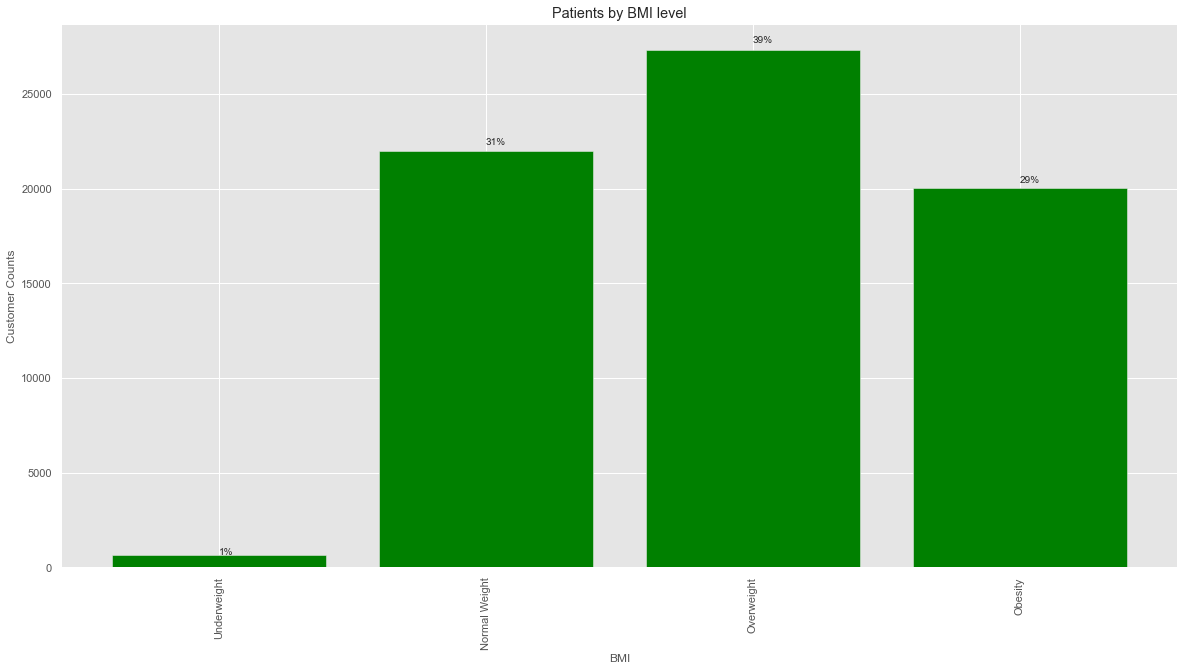

In [154]:
# Outlier Treatment


df_cardio_base['bmi'] = np.where(df_cardio_base['bmi']>50,50,df_cardio_base['bmi'])

 

# Create multiple group using lamda function

def bmicat(values):

    if values <=18.5:

        return 1

    elif 18.5<values<=24.9:

        return 2

    elif 24.9<values<=29.9:

        return 3

    else:

        return 4

   

# Create categorical variable

df_cardio_base['bmi_cat'] = df_cardio_base.bmi.apply(lambda x: bmicat(x) )

 

# Get counts for each gender

bmi_cat_summary=df_cardio_base.groupby('bmi_cat')['bmi_cat'].count()

bmi_cat_summary.index=['Underweight', 'Normal Weight', "Overweight","Obesity"]

# Get %

bmi_pct = round(bmi_cat_summary*100/bmi_cat_summary.sum(),0)

# Bar Chart

plt.style.use('ggplot')

plt.bar(bmi_cat_summary.index, bmi_cat_summary, color='green')

plt.xlabel("BMI")

plt.ylabel("Customer Counts")

plt.title("Patients by BMI level")

plt.xticks(rotation=90) # change orientation of X axis tick label

# text on the top

for index, value in enumerate(bmi_pct):

    plt.text(index,bmi_cat_summary[index]+value*10, str(int(value))+"%")

plt.show()

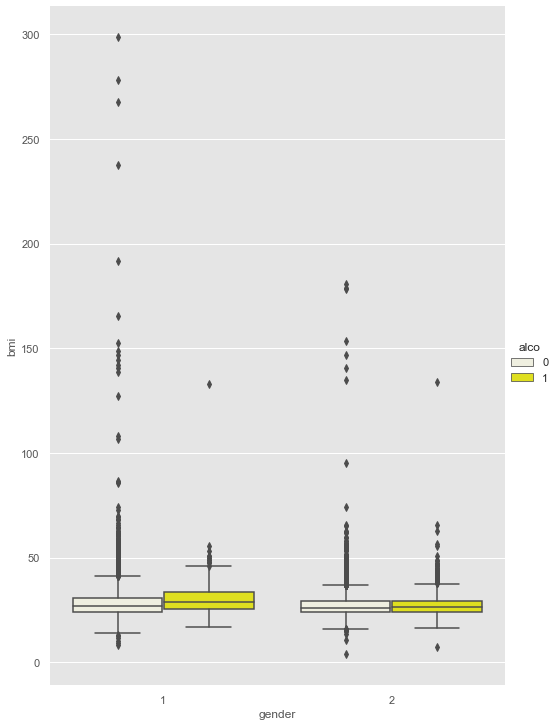

In [155]:
train_data['bmi'] = train_data['weight']/((train_data['height']/100)**2)
sns.catplot(x="gender", y="bmi", hue="alco", data=train_data, color = "yellow",kind="box", height=10, aspect=.7);

In [156]:
train_data.head(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,years,age_years,bmi
0,44,14605,1,159,60.0,110,70,1,0,0,40,40.0,23.733238
1,45,20652,1,160,73.0,130,85,1,0,0,57,57.0,28.515625
2,46,21940,2,173,82.0,140,90,3,0,0,60,60.0,27.398176
3,47,20404,1,163,55.0,120,80,1,0,0,56,56.0,20.700817


In [157]:
test_data['bmi'] = test_data['weight']/((test_data['height']/100)**2)

In [158]:
test_data.head(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,bmi
0,0,18393,2,168,62.0,110,80,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,0,34.927679
2,2,18857,1,165,64.0,130,70,3,0,23.507805
3,3,17623,2,169,82.0,150,100,1,0,28.710479


In [159]:
train_data.isnull().values.any()

False

In [160]:
test_data.isnull().values.any()

False

In [161]:
df_cardio_base1.drop(df_cardio_base1[(df_cardio_base1['height'] > df_cardio_base1['height'].quantile(0.975)) | (df_cardio_base1['height'] < df_cardio_base1['height'].quantile(0.025))].index,inplace=True)
df_cardio_base1.drop(df_cardio_base1[(df_cardio_base1['weight'] > df_cardio_base1['weight'].quantile(0.975)) | (df_cardio_base1['weight'] < df_cardio_base1['weight'].quantile(0.025))].index,inplace=True)

In [162]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df_cardio_base1[df_cardio_base1['ap_lo']> df_cardio_base1['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [163]:
df_cardio_base1.drop(df_cardio_base1[(df_cardio_base1['ap_hi'] > df_cardio_base1['ap_hi'].quantile(0.975)) | (df_cardio_base1['ap_hi'] < df_cardio_base1['ap_hi'].quantile(0.025))].index,inplace=True)
df_cardio_base1.drop(df_cardio_base1[(df_cardio_base1['ap_lo'] > df_cardio_base1['ap_lo'].quantile(0.975)) | (df_cardio_base1['ap_lo'] < df_cardio_base1['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


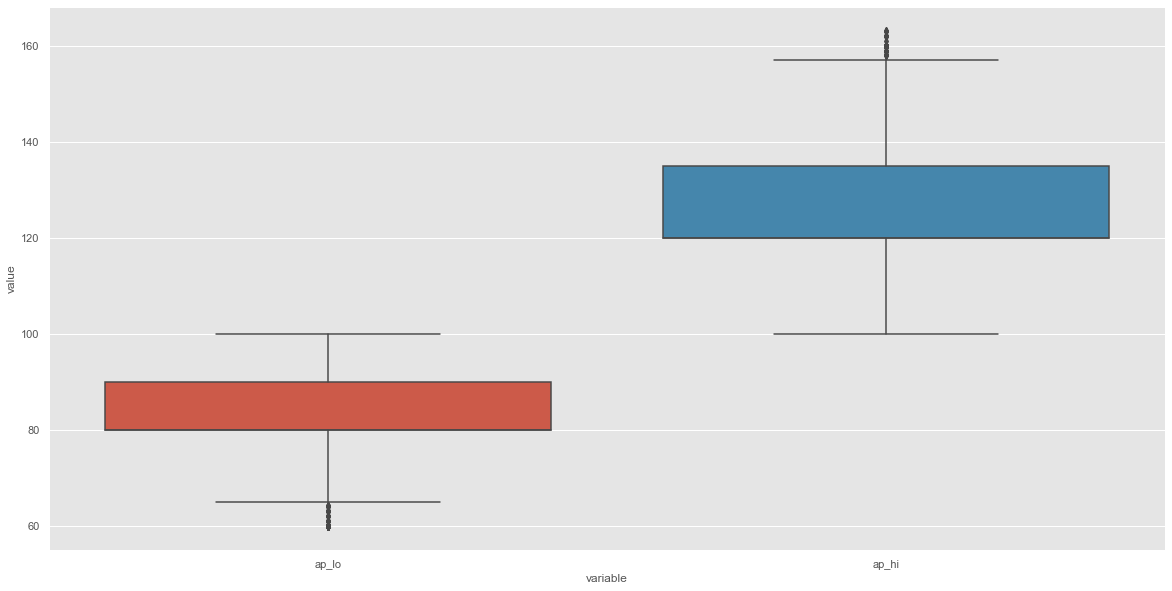

In [164]:
blood_pressure = df_cardio_base1.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df_cardio_base1[df_cardio_base1['ap_lo']> df_cardio_base1['ap_hi']].shape[0]))

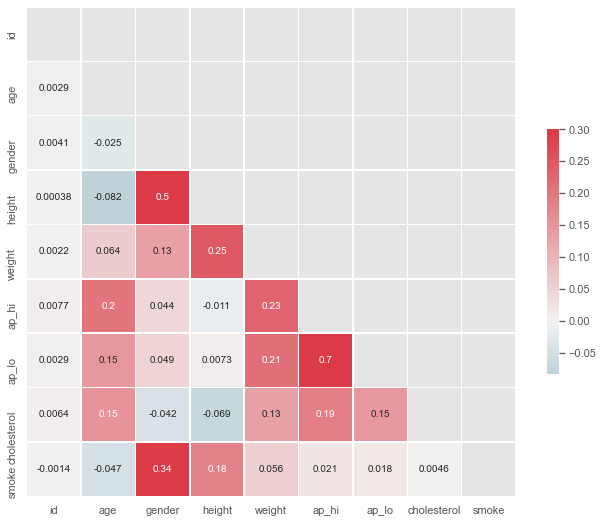

In [165]:
corr = df_cardio_base1.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

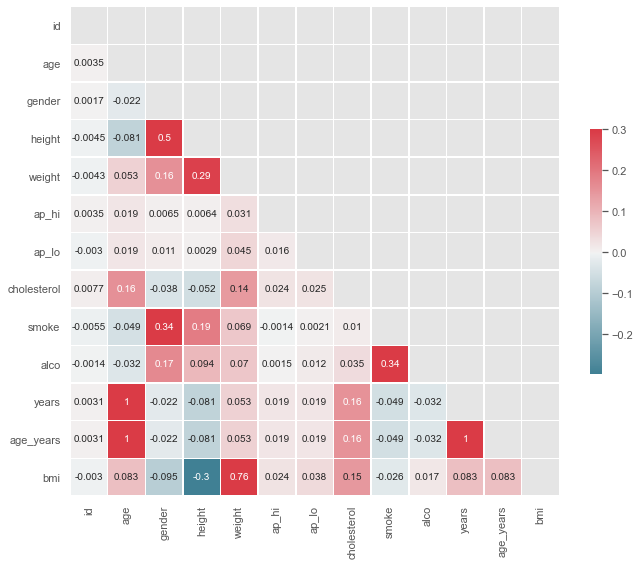

In [166]:
corr = train_data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

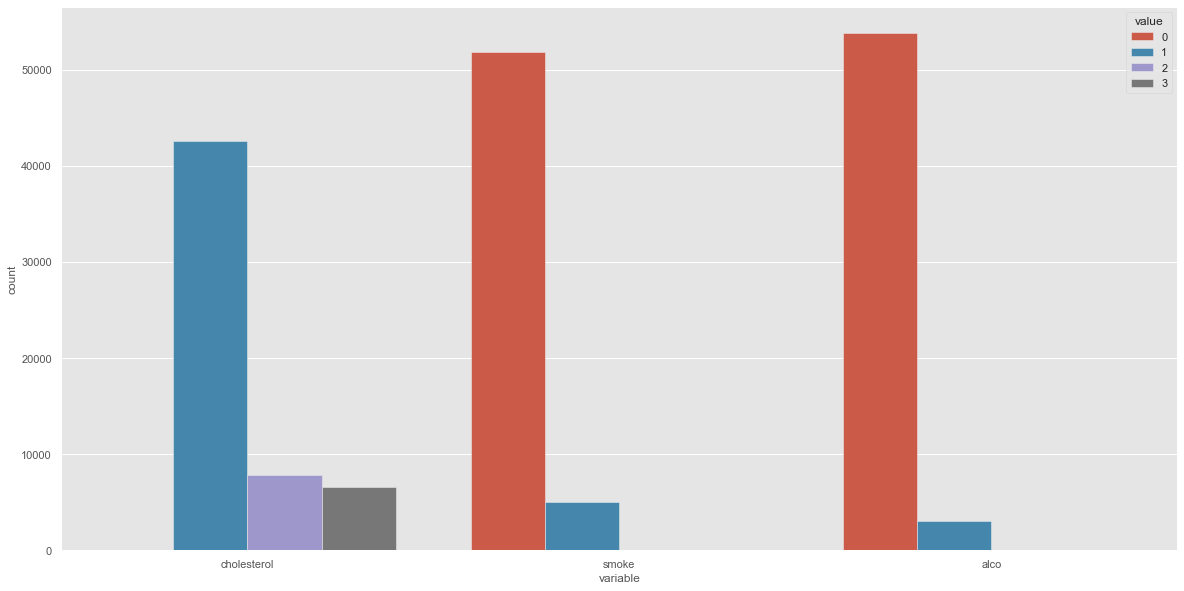

In [167]:
df_categorical = train_data.loc[:,['cholesterol','smoke', 'alco']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

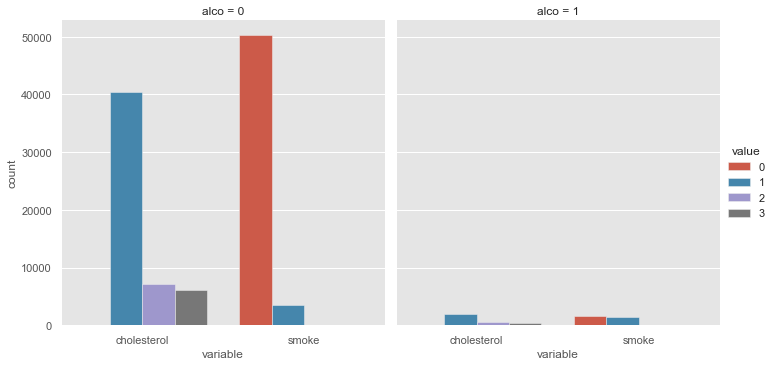

In [168]:
df_long = pd.melt(train_data, id_vars=['alco'], value_vars=['cholesterol', 'smoke'])
sns.catplot(x="variable", hue="value", col="alco",
                data=df_long, kind="count")

In [169]:
df_cardio_base.groupby('gender')['height'].mean()

gender
1    161.354667
2    169.947895
Name: height, dtype: float64

In [170]:
df_cardio_base ['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [171]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56903 entries, 0 to 56902
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56903 non-null  int64  
 1   age          56903 non-null  int64  
 2   gender       56903 non-null  int64  
 3   height       56903 non-null  int64  
 4   weight       56903 non-null  float64
 5   ap_hi        56903 non-null  int64  
 6   ap_lo        56903 non-null  int64  
 7   cholesterol  56903 non-null  int64  
 8   smoke        56903 non-null  int64  
 9   alco         56903 non-null  int64  
 10  years        56903 non-null  int32  
 11  age_years    56903 non-null  float64
 12  bmi          56903 non-null  float64
dtypes: float64(3), int32(1), int64(9)
memory usage: 7.9 MB


In [172]:
df_cardio_base['age'] = df_cardio_base['age']/365
df_cardio_base.age = df_cardio_base.age.round()
df_cardio_base

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,ap_hi_cat,ap_lo_cat,ap_lo_mod_10,bmi,bmi_cat
0,0,50.0,2,168,62.0,110,80,1,0,1,2,1,22.0,2
1,1,55.0,1,156,85.0,140,90,3,0,2,2,1,35.0,4
2,2,52.0,1,165,64.0,130,70,3,0,2,2,1,24.0,2
3,3,48.0,2,169,82.0,150,100,1,0,2,2,1,29.0,3
4,4,48.0,1,156,56.0,100,60,1,0,1,2,1,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,2,1,27.0,3
69996,99995,62.0,1,158,126.0,140,90,2,0,2,2,1,50.0,4
69997,99996,52.0,2,183,105.0,180,90,3,0,2,2,1,31.0,4
69998,99998,61.0,1,163,72.0,135,80,1,0,2,2,1,27.0,3


In [173]:
temp = df_cardio_base.groupby("age").mean()
mx = max(temp.weight)
mn = min(temp.weight)
(mx-mn)/mx

0.10823802420023199

In [174]:
temp

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,ap_hi_cat,ap_lo_cat,ap_lo_mod_10,bmi,bmi_cat
age,,,,,,,,,,,,,
30.0,41090.750000,1.250000,167.250000,67.250000,112.500000,72.500000,1.000000,0.000000,1.000000,2.000000,1.000000,23.750000,2.500000
39.0,49214.056235,1.413203,165.618582,73.633985,119.029340,77.674817,1.205379,0.107579,1.242054,2.009780,0.963325,26.855746,2.823961
40.0,48709.236296,1.361481,165.038889,71.452852,118.861111,77.990000,1.170000,0.101852,1.209259,2.001481,0.977037,26.199259,2.730741
41.0,50207.706266,1.369452,165.631854,72.883812,120.575718,78.647520,1.219321,0.121410,1.244125,2.011749,0.977807,26.532637,2.797650
42.0,50538.328887,1.392530,165.444741,72.074009,120.160442,78.607851,1.187500,0.115473,1.237043,2.007622,0.972561,26.288491,2.761814
43.0,49818.402899,1.375362,165.268116,73.456522,121.266667,79.911594,1.313043,0.113043,1.314493,2.008696,0.972464,26.852174,2.833333
44.0,49848.861121,1.385266,165.683821,73.483468,121.987663,79.848784,1.221361,0.111738,1.300317,2.011280,0.977793,26.751146,2.855834
45.0,48259.006605,1.384412,165.508587,74.083223,123.417437,80.961691,1.265522,0.120211,1.326288,2.014531,0.972259,27.051519,2.915456
46.0,49888.164805,1.397970,165.173604,73.481083,123.100169,80.118105,1.239255,0.110660,1.323181,2.007783,0.980034,26.920135,2.857530


In [175]:
sm_avg= np.mean(temp[temp.index<=50]).cholesterol.tolist()
sm_avg

1.2300086122210974

In [176]:
bg_avg= np.mean(temp[temp.index>50]).cholesterol.tolist()
bg_avg

1.4349953954722983

In [177]:
(bg_avg-sm_avg)/bg_avg

0.14284839094116664

In [178]:
temp = cardio_base.groupby("gender").mean()
mx = temp[temp.index==2].smoke.tolist()[0]
mn = temp[temp.index==1].smoke.tolist()[0]
mx/mn                                              

NameError: name 'cardio_base' is not defined